In [1]:
import copy
import glob
from itertools import chain
import os
import pickle

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.xmargin'] = .005
import numpy as np
import pandas as pd
from rdkit.Chem.Scaffolds import MurckoScaffold 
import seaborn as sns
sns.set_theme(rc={"figure.dpi": 500})

In [2]:
class ResultContent():
    def __init__(self):
        self.result_stat =  {
            'mean': {
                'enrichment_factor_f001': [],
                'enrichment_factor_f005': [],
                'BEDROC_a20': [],
                'BEDROC_a100': [],
                'AUC': []}, 
            'std': {
                'enrichment_factor_f001': [],
                'enrichment_factor_f005': [],
                'BEDROC_a20': [],
                'BEDROC_a100': [],
                'AUC': []},
            } 

dataset_root_dir = "./result/benchmarking_platform/"
dataset_names = ["MUV", "DUD", "ChEMBL"]
fp_names = ["ge_sim", "morgan_fp", "fc_fp", "atom_pair_fp", "maccs_key", "tt_fp"]
result_summary_dict = {}

for dname in dataset_names:
    print(dname)
    result_summary_dict[dname] = {
        "target_label": None,
        "result_content": {
            fp: None for fp in fp_names
        }}
    keep_label = True
    target_dataset_path = os.path.join(dataset_root_dir, dname)

    for fp_name in fp_names:
        result_file_paths = sorted(glob.glob(os.path.join(target_dataset_path, fp_name, "result_*.pkl")))
        assert len(result_file_paths) == 2

        result_content = ResultContent()
        for fpath in result_file_paths:
            with open(fpath, 'rb') as f:
                vs_result = pickle.load(f)
            target_labels = list(vs_result.keys())
            if keep_label:
                target_labels_ref = copy.deepcopy(target_labels)
                if dname == "DUD":
                    result_summary_dict[dname]["target_label"] = [f"DUD_{s}" for s in target_labels_ref]
                elif dname == "LIT_PCBA":
                    result_summary_dict[dname]["target_label"] = [f"LITPCBA_{s}" for s in target_labels_ref]
                else:
                    result_summary_dict[dname]["target_label"] = target_labels_ref
                keep_label = False
            assert target_labels == target_labels_ref, f"{fpath}"

            if os.path.basename(fpath) == "result_a100_f001.pkl":
                for tlabel in target_labels:
                    result_content.result_stat['mean']['enrichment_factor_f001'].append(np.mean(vs_result[tlabel]['enrichment_factor']))
                    result_content.result_stat['std']['enrichment_factor_f001'].append(np.std(vs_result[tlabel]['enrichment_factor']))
                    result_content.result_stat['mean']['BEDROC_a100'].append(np.mean(vs_result[tlabel]['BEDROC']))
                    result_content.result_stat['std']['BEDROC_a100'].append(np.std(vs_result[tlabel]['BEDROC']))
                    result_content.result_stat['mean']['AUC'].append(np.mean(vs_result[tlabel]['AUC']))
                    result_content.result_stat['std']['AUC'].append(np.std(vs_result[tlabel]['AUC']))
            elif os.path.basename(fpath) == "result_a20_f005.pkl":
                for tlabel in target_labels:
                    result_content.result_stat['mean']['enrichment_factor_f005'].append(np.mean(vs_result[tlabel]['enrichment_factor']))
                    result_content.result_stat['std']['enrichment_factor_f005'].append(np.std(vs_result[tlabel]['enrichment_factor']))
                    result_content.result_stat['mean']['BEDROC_a20'].append(np.mean(vs_result[tlabel]['BEDROC']))
                    result_content.result_stat['std']['BEDROC_a20'].append(np.std(vs_result[tlabel]['BEDROC']))
            else:
                raise FileNotFoundError(f"Invalid result filename: {fpath}")
        result_summary_dict[dname]["result_content"][fp_name] = result_content.result_stat


print(result_summary_dict)


def plot_max_perf_freq(df, metric):
    max_methods_freq = df.idxmax().value_counts()
    plt.figure(figsize=(6, 4))
    max_methods_freq.plot(kind='bar', color='grey')
    plt.title(f'Histogram of Methods with Maximum {metric} in Each Target')
    plt.xlabel('Method')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

all_active_fnames = glob.glob("./data/benchmarking_platform/compounds/*/*/actives.smi")
target_ba_ratio_dict = {}
for fname in all_active_fnames:
    target_name = os.path.basename(os.path.dirname(fname))
    with open(fname, 'r') as f:
        smiles_list = [l.split(' ')[0] for l in f.readlines()]
        bms_set = set([MurckoScaffold.MurckoScaffoldSmilesFromSmiles(s) for s in smiles_list])
    target_ba_ratio_dict[target_name] = round(len(bms_set) / len(smiles_list), 2)


MUV
DUD
ChEMBL
{'MUV': {'target_label': ['MUV_466', 'MUV_548', 'MUV_600', 'MUV_644', 'MUV_652', 'MUV_689', 'MUV_692', 'MUV_712', 'MUV_713', 'MUV_733', 'MUV_737', 'MUV_810', 'MUV_832', 'MUV_846', 'MUV_852', 'MUV_858', 'MUV_859'], 'result_content': {'ge_sim': {'mean': {'enrichment_factor_f001': [4.139337748344371, 18.06980132450331, 6.04980132450331, 16.23894039735099, 3.3433112582781455, 3.2637086092715233, 0.9552317880794702, 6.049801324503311, 6.288609271523178, 7.403046357615893, 2.3880794701986754, 4.935364238410596, 28.25894039735099, 20.139470198675497, 27.224105960264897, 8.19907284768212, 1.5124503311258277], 'enrichment_factor_f005': [2.173829787234043, 8.103909574468085, 3.228776595744681, 6.8571542553191485, 2.013989361702128, 2.221781914893617, 0.8311702127659575, 2.4135904255319147, 1.9660372340425534, 2.6373670212765963, 1.2787234042553193, 2.3656382978723403, 6.873138297872339, 6.825186170212765, 6.697313829787233, 2.8291755319148932, 2.25375], 'BEDROC_a20': [0.1032040174

# BEDROC (a=20)

/tmp/ipykernel_505791/635423155.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65, fontsize=5)
/tmp/ipykernel_505791/635423155.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


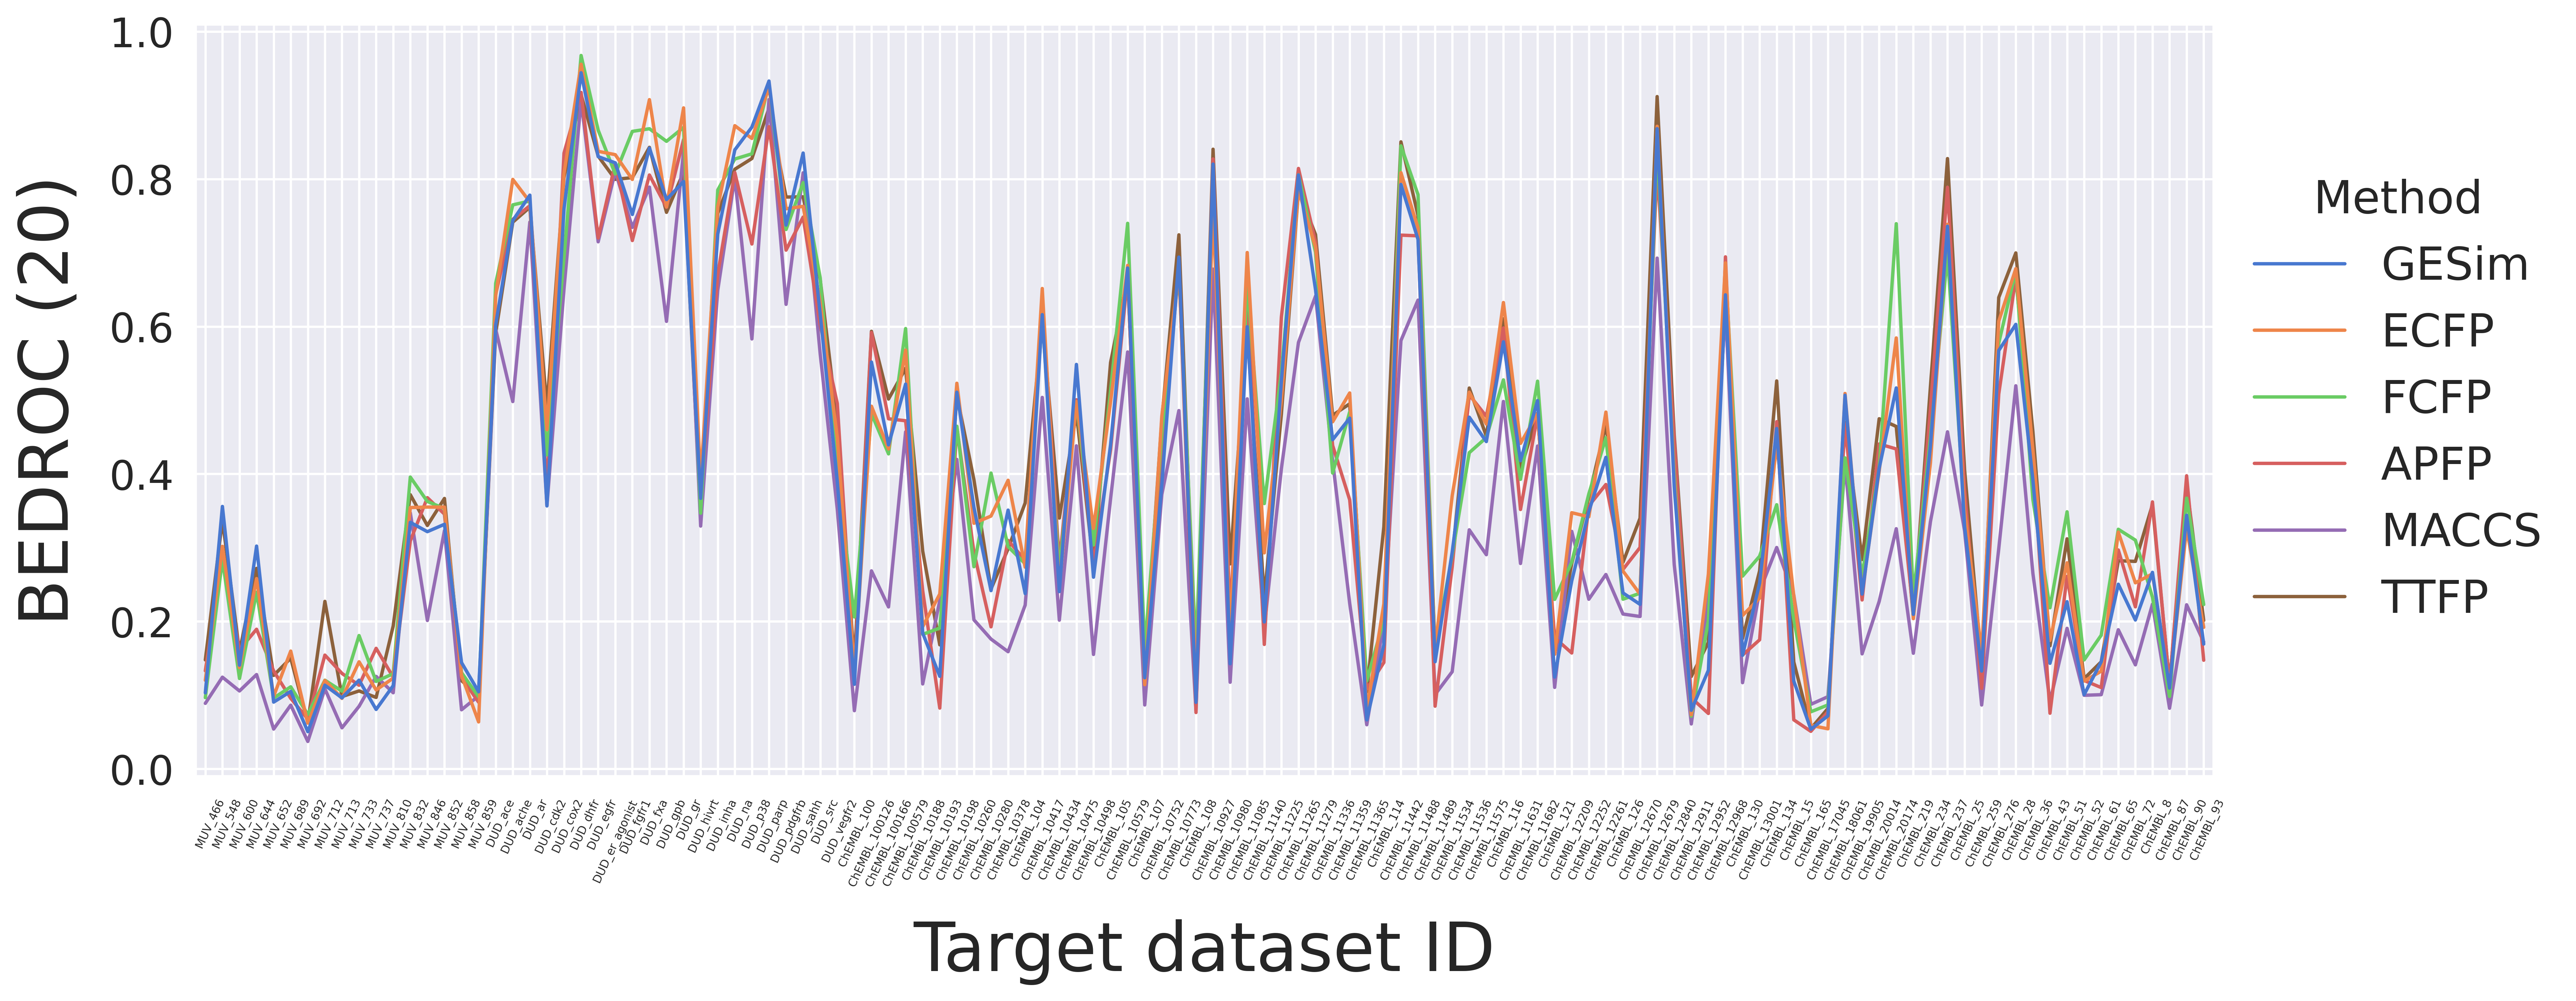

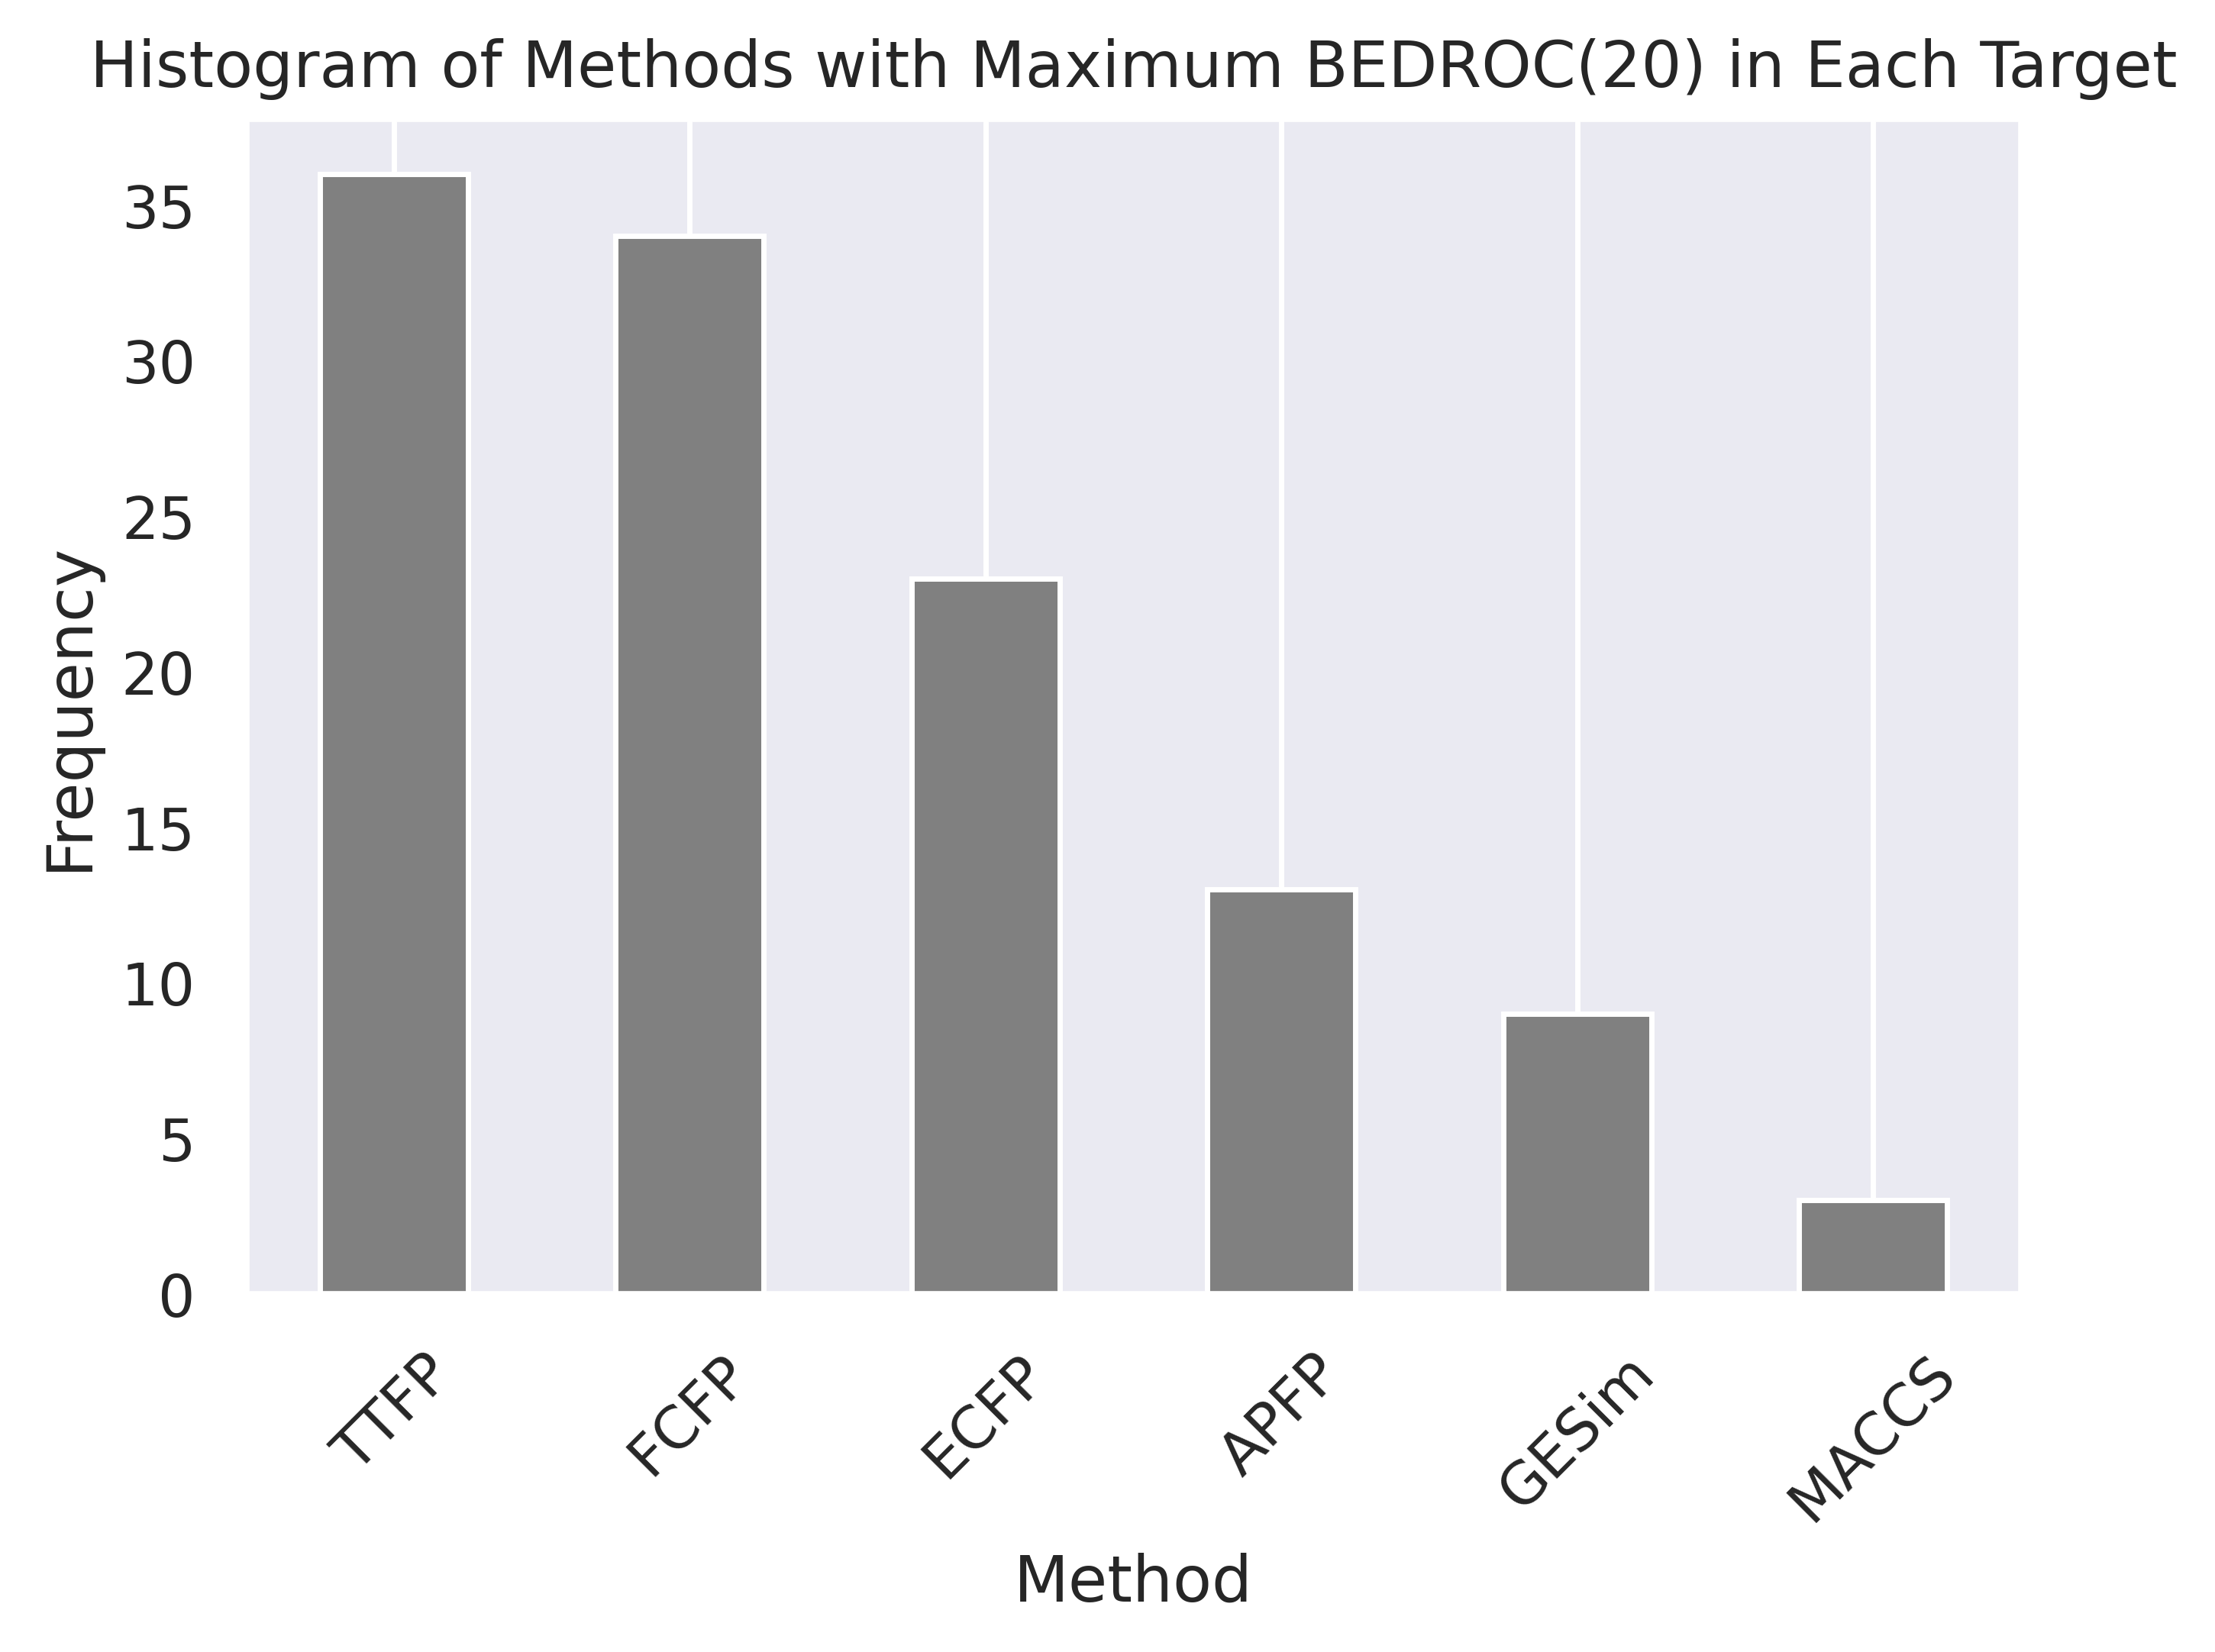

Method
TTFP     2.644068
MACCS    5.491525
APFP     3.567797
FCFP     2.771186
ECFP     2.779661
GESim    3.745763
dtype: float64
MUV_548 0.97
MUV_644 0.93
MUV_858 0.9
MUV_859 1.0
ar 0.31
p38 0.34
parp 0.29
sahh 0.3
ChEMBL_10475 0.45


In [4]:
metric = 'BEDROC_a20'

all_target_names = list(chain(*[result_summary_dict[d]['target_label'] for d in dataset_names]))
max_label_length = max([len(s) for s in all_target_names])
all_target_names_pad = [s.rjust(max_label_length) for s in all_target_names]

df = pd.DataFrame(
    {
     "TTFP": list(chain(*[result_summary_dict[d]['result_content']['tt_fp']['mean'][metric] for d in dataset_names])),
     "MACCS": list(chain(*[result_summary_dict[d]['result_content']['maccs_key']['mean'][metric] for d in dataset_names])),
     "APFP": list(chain(*[result_summary_dict[d]['result_content']['atom_pair_fp']['mean'][metric] for d in dataset_names])),
     "FCFP": list(chain(*[result_summary_dict[d]['result_content']['fc_fp']['mean'][metric] for d in dataset_names])),
     "ECFP": list(chain(*[result_summary_dict[d]['result_content']['morgan_fp']['mean'][metric] for d in dataset_names])),
     "GESim": list(chain(*[result_summary_dict[d]['result_content']['ge_sim']['mean'][metric] for d in dataset_names])),
     },
    index=all_target_names_pad
).T
df.index.name = "Method"
df_ = df.reset_index().melt(id_vars="Method", var_name="Target", value_name="Value")

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.lineplot(df_, x="Target", y="Value", hue="Method", marker=None, markersize=3, palette=sns.color_palette("muted")[:6][::-1], ax=ax)
ax.set_ylim(-0.01, 1.01)

ax.set_xticklabels(ax.get_xticklabels(), rotation=65, fontsize=5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Method", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20, title_fontsize=20, frameon=False)
ax.set_xlabel("Target dataset ID", fontsize=30, labelpad=12)
ax.set_ylabel("BEDROC (20)", fontsize=30, labelpad=12)

plot_max_perf_freq(df, metric='BEDROC(20)')

print(df.rank(ascending=False).mean(axis=1))

df_rank = df.rank(ascending=False)
gesim_top_target = df_rank.columns[df_rank.loc['GESim'] == 1.0].tolist()
gesim_top_target = [t.strip(' ').strip('DUD_') for t in gesim_top_target]
#target_ba_ratio_dict
for t in gesim_top_target:
    print(f"{t} {target_ba_ratio_dict[t]}")

# AUC

/tmp/ipykernel_505791/2918594476.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65, fontsize=5)
/tmp/ipykernel_505791/2918594476.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


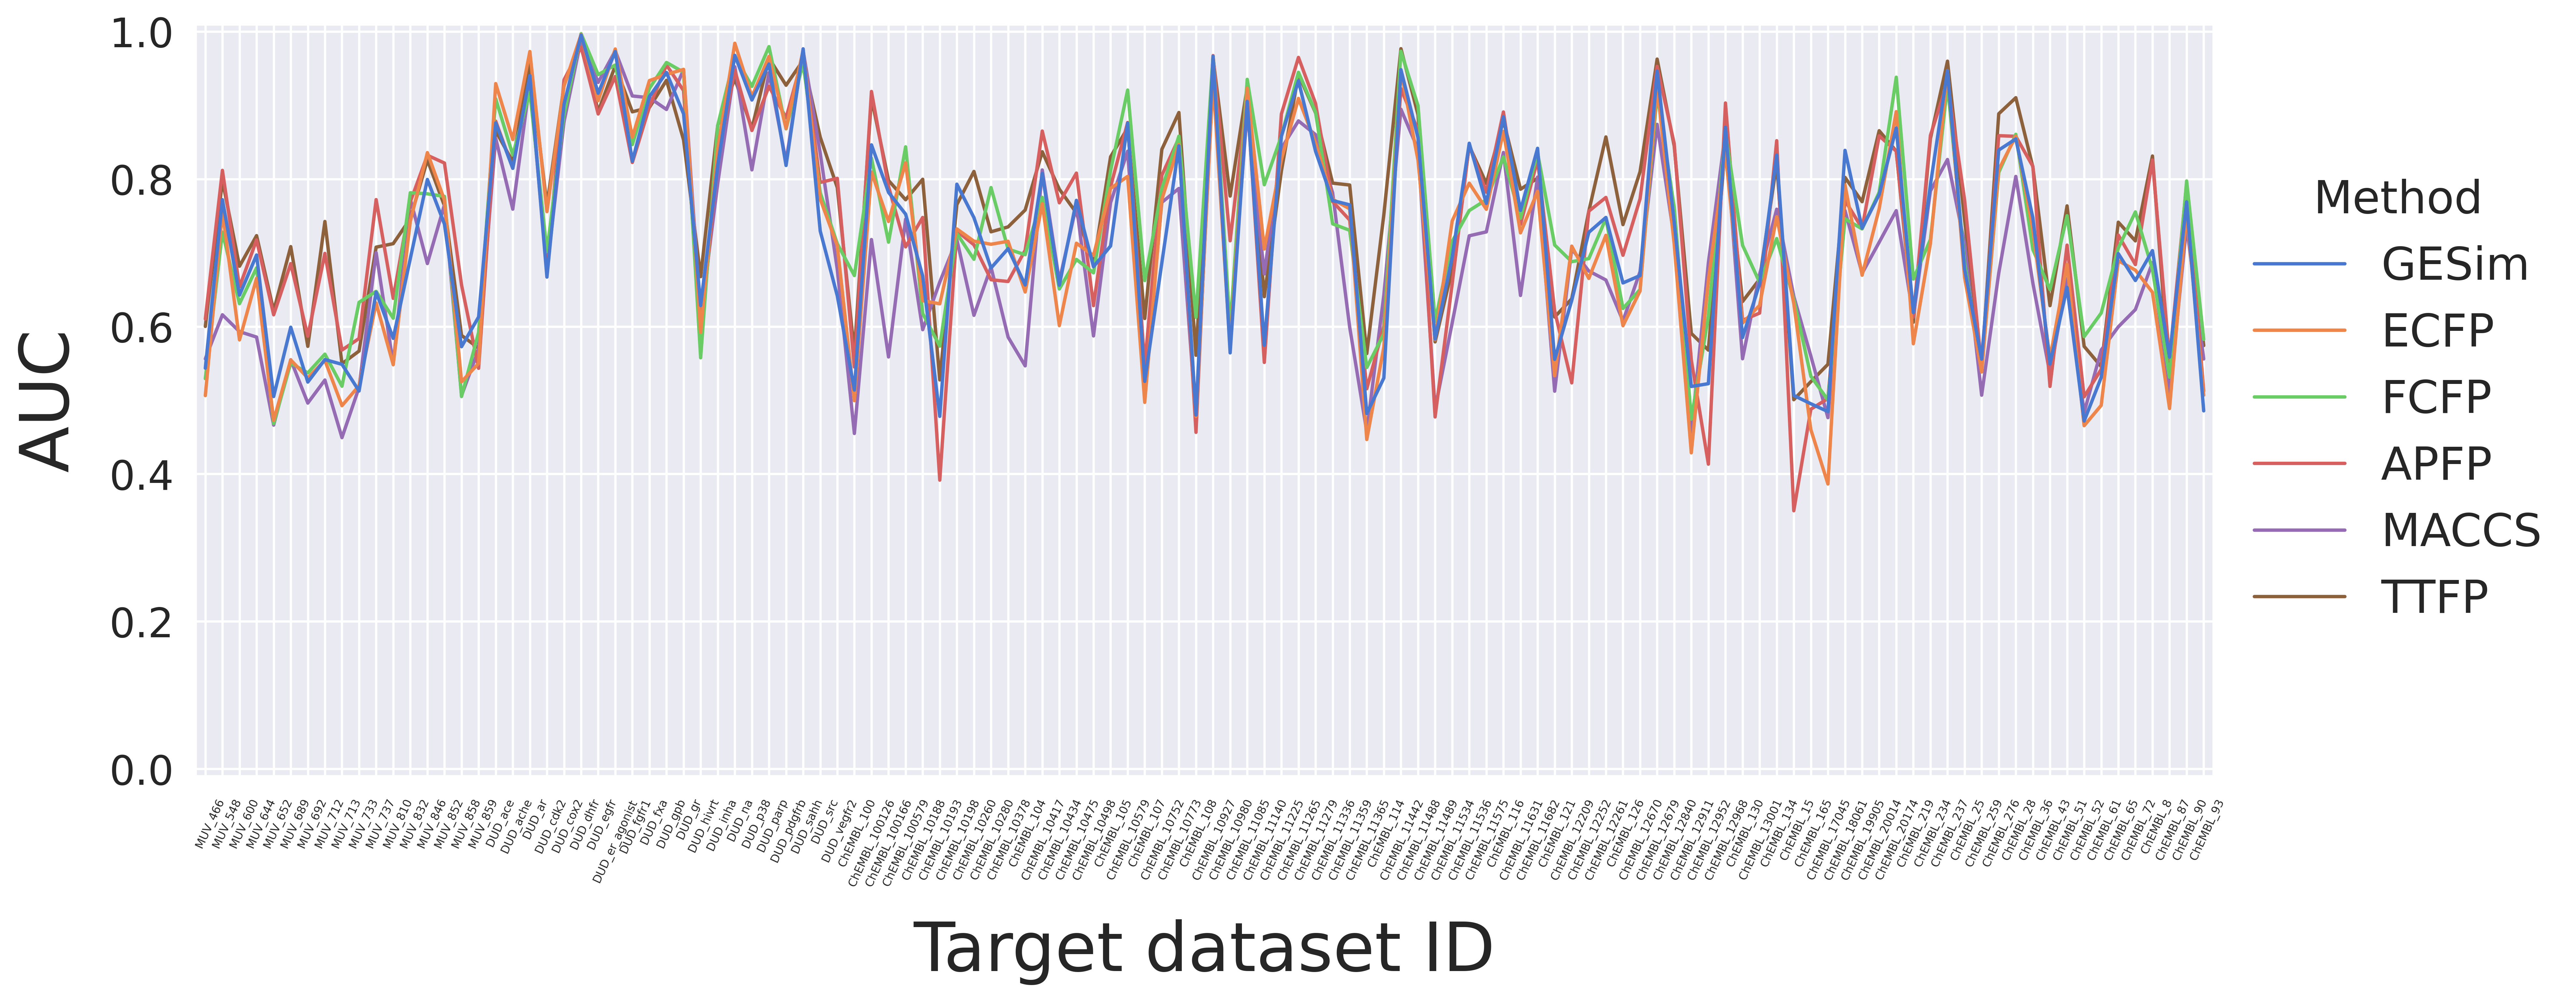

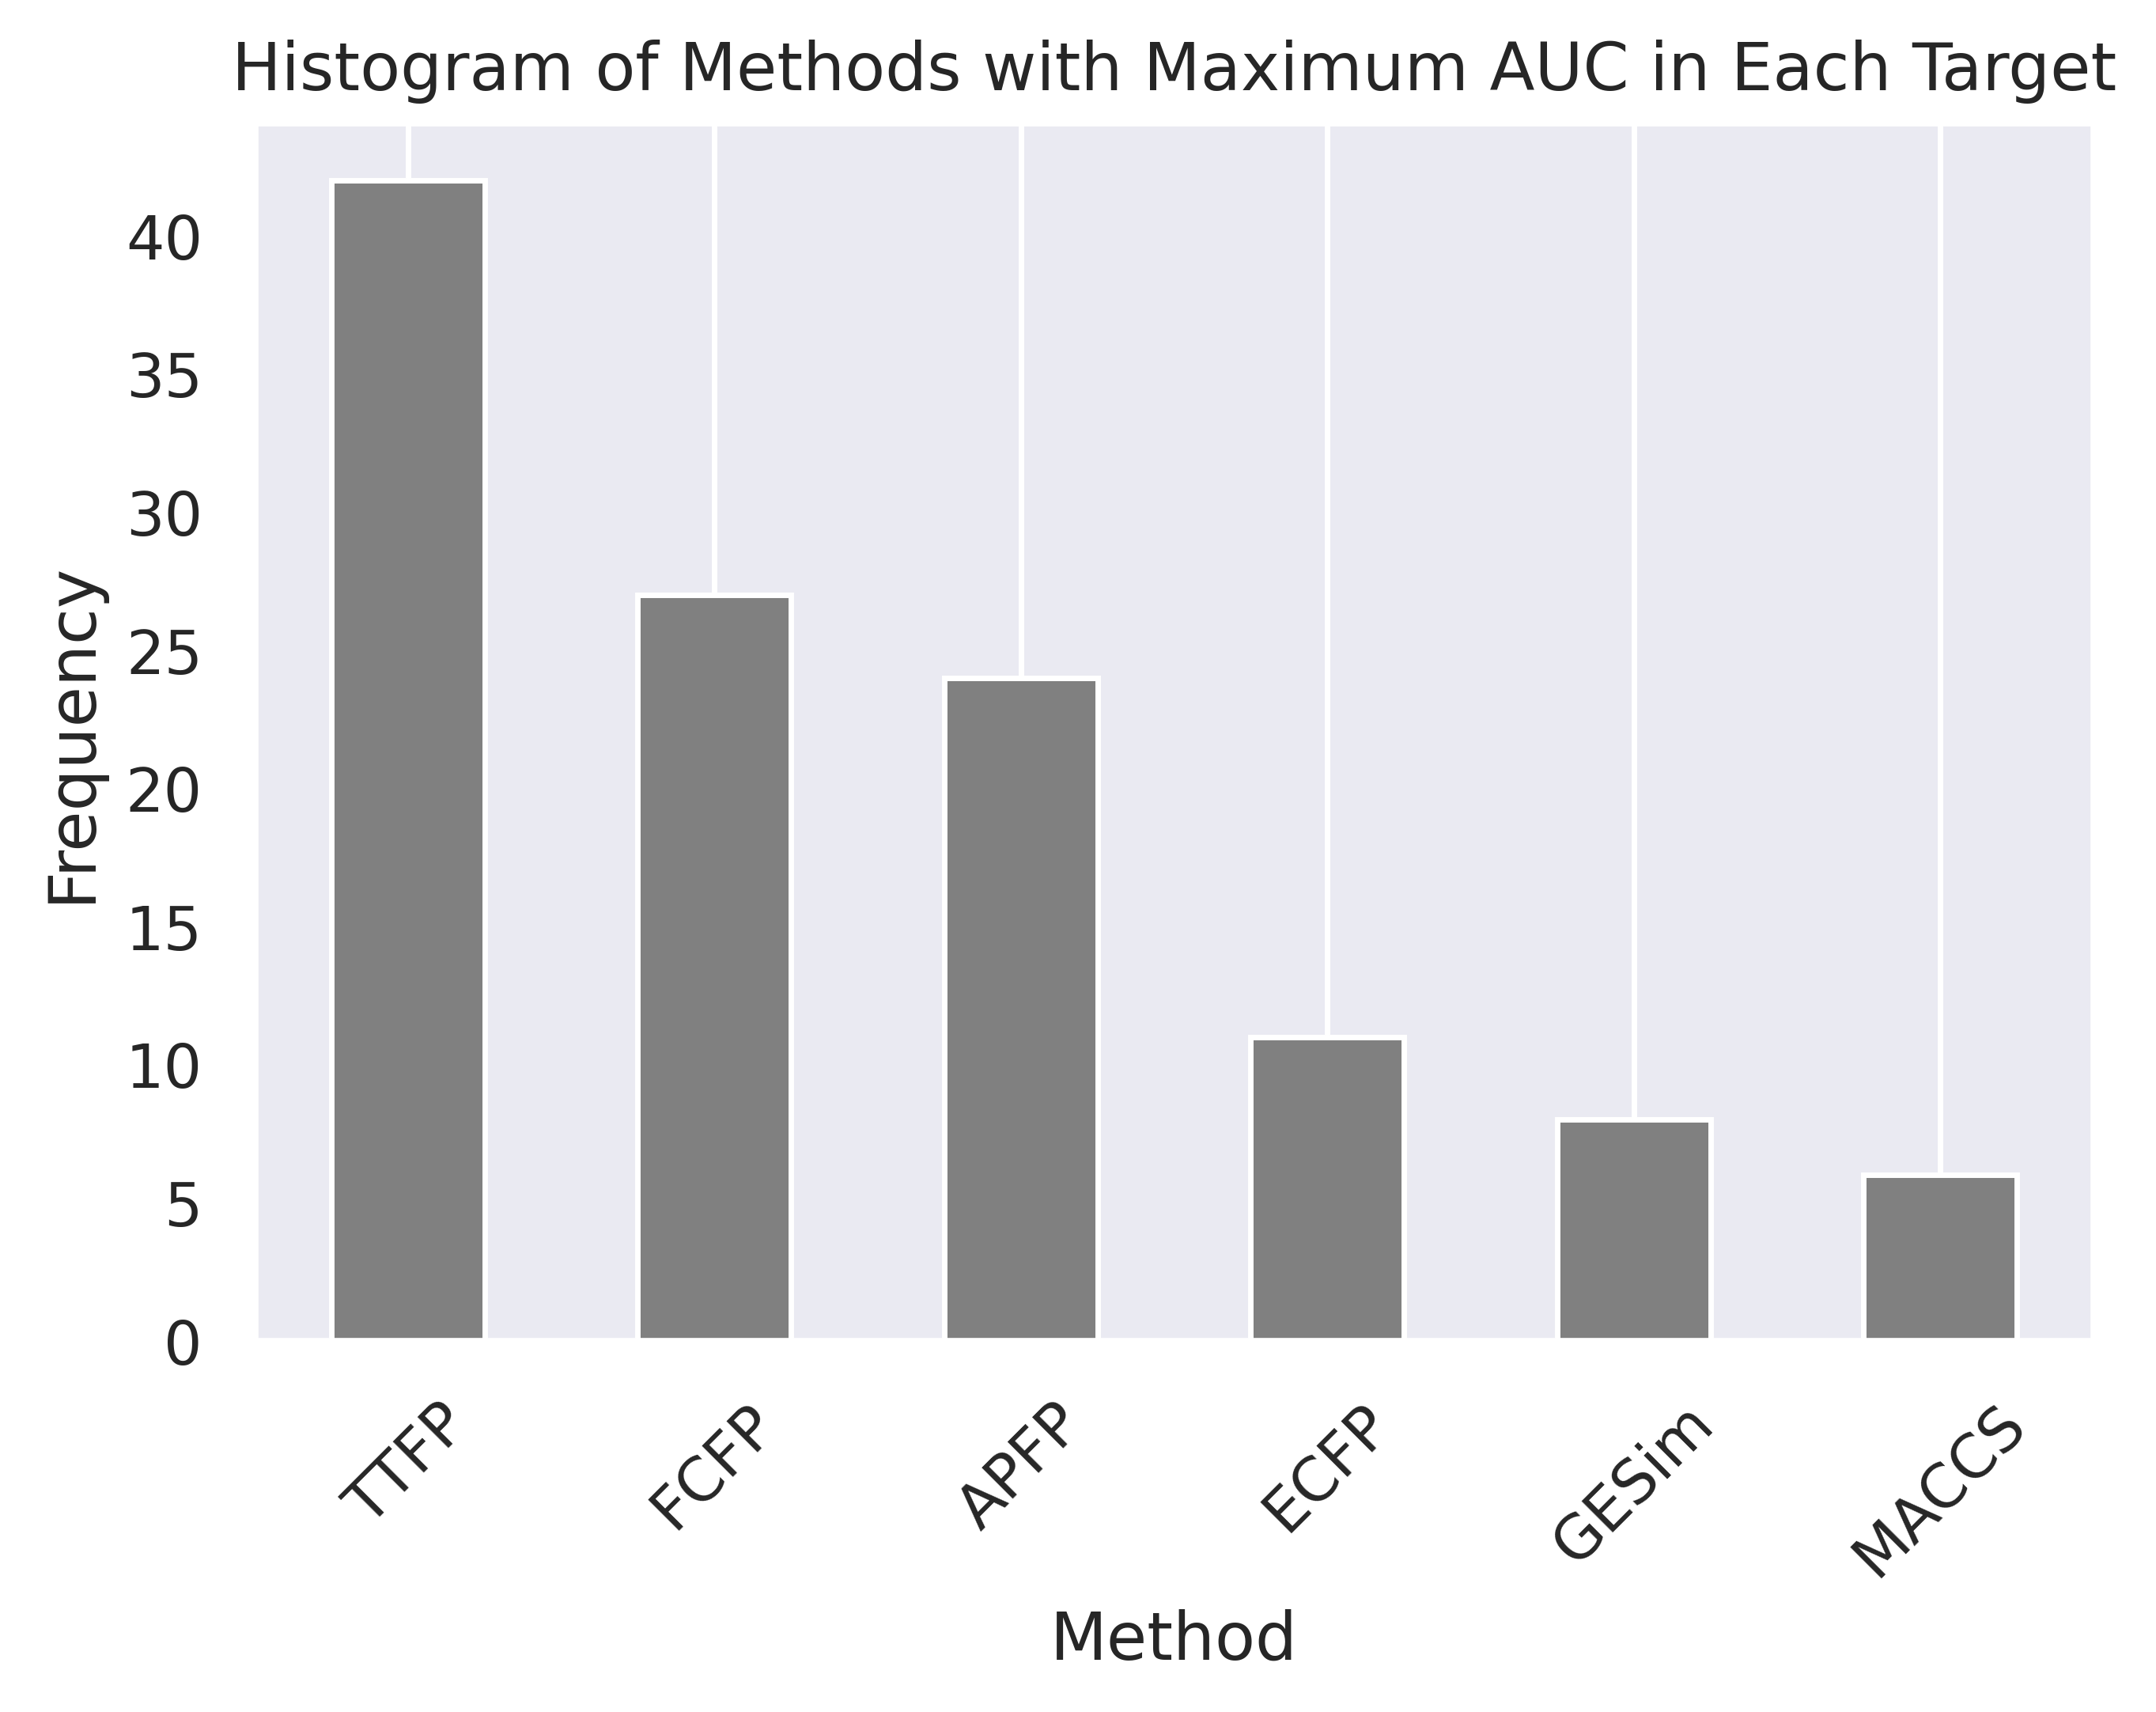

Method
TTFP     2.406780
MACCS    4.610169
APFP     3.076271
FCFP     3.144068
ECFP     4.084746
GESim    3.677966
dtype: float64


In [5]:
metric = 'AUC'

all_target_names = list(chain(*[result_summary_dict[d]['target_label'] for d in dataset_names]))
max_label_length = max([len(s) for s in all_target_names])
all_target_names_pad = [s.rjust(max_label_length) for s in all_target_names]

df = pd.DataFrame(
    {
     "TTFP": list(chain(*[result_summary_dict[d]['result_content']['tt_fp']['mean'][metric] for d in dataset_names])),
     "MACCS": list(chain(*[result_summary_dict[d]['result_content']['maccs_key']['mean'][metric] for d in dataset_names])),
     "APFP": list(chain(*[result_summary_dict[d]['result_content']['atom_pair_fp']['mean'][metric] for d in dataset_names])),
     "FCFP": list(chain(*[result_summary_dict[d]['result_content']['fc_fp']['mean'][metric] for d in dataset_names])),
     "ECFP": list(chain(*[result_summary_dict[d]['result_content']['morgan_fp']['mean'][metric] for d in dataset_names])),
     "GESim": list(chain(*[result_summary_dict[d]['result_content']['ge_sim']['mean'][metric] for d in dataset_names])),
     },
    index=all_target_names_pad
).T
df.index.name = "Method"
df_ = df.reset_index().melt(id_vars="Method", var_name="Target", value_name="Value")

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.lineplot(df_, x="Target", y="Value", hue="Method", marker=None, markersize=3, palette=sns.color_palette("muted")[:6][::-1], ax=ax)
ax.set_ylim(-0.01, 1.01)

ax.set_xticklabels(ax.get_xticklabels(), rotation=65, fontsize=5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Method", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20, title_fontsize=20, frameon=False)
ax.set_xlabel("Target dataset ID", fontsize=30, labelpad=12)
ax.set_ylabel("AUC", fontsize=30, labelpad=12)

plot_max_perf_freq(df, metric='AUC')

print(df.rank(ascending=False).mean(axis=1))

/tmp/ipykernel_505791/2097406778.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30)
/tmp/ipykernel_505791/2097406778.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


[Text(0, 1.0, '1'),
 Text(0, 2.0, '2'),
 Text(0, 3.0, '3'),
 Text(0, 4.0, '4'),
 Text(0, 5.0, '5'),
 Text(0, 6.0, '6')]

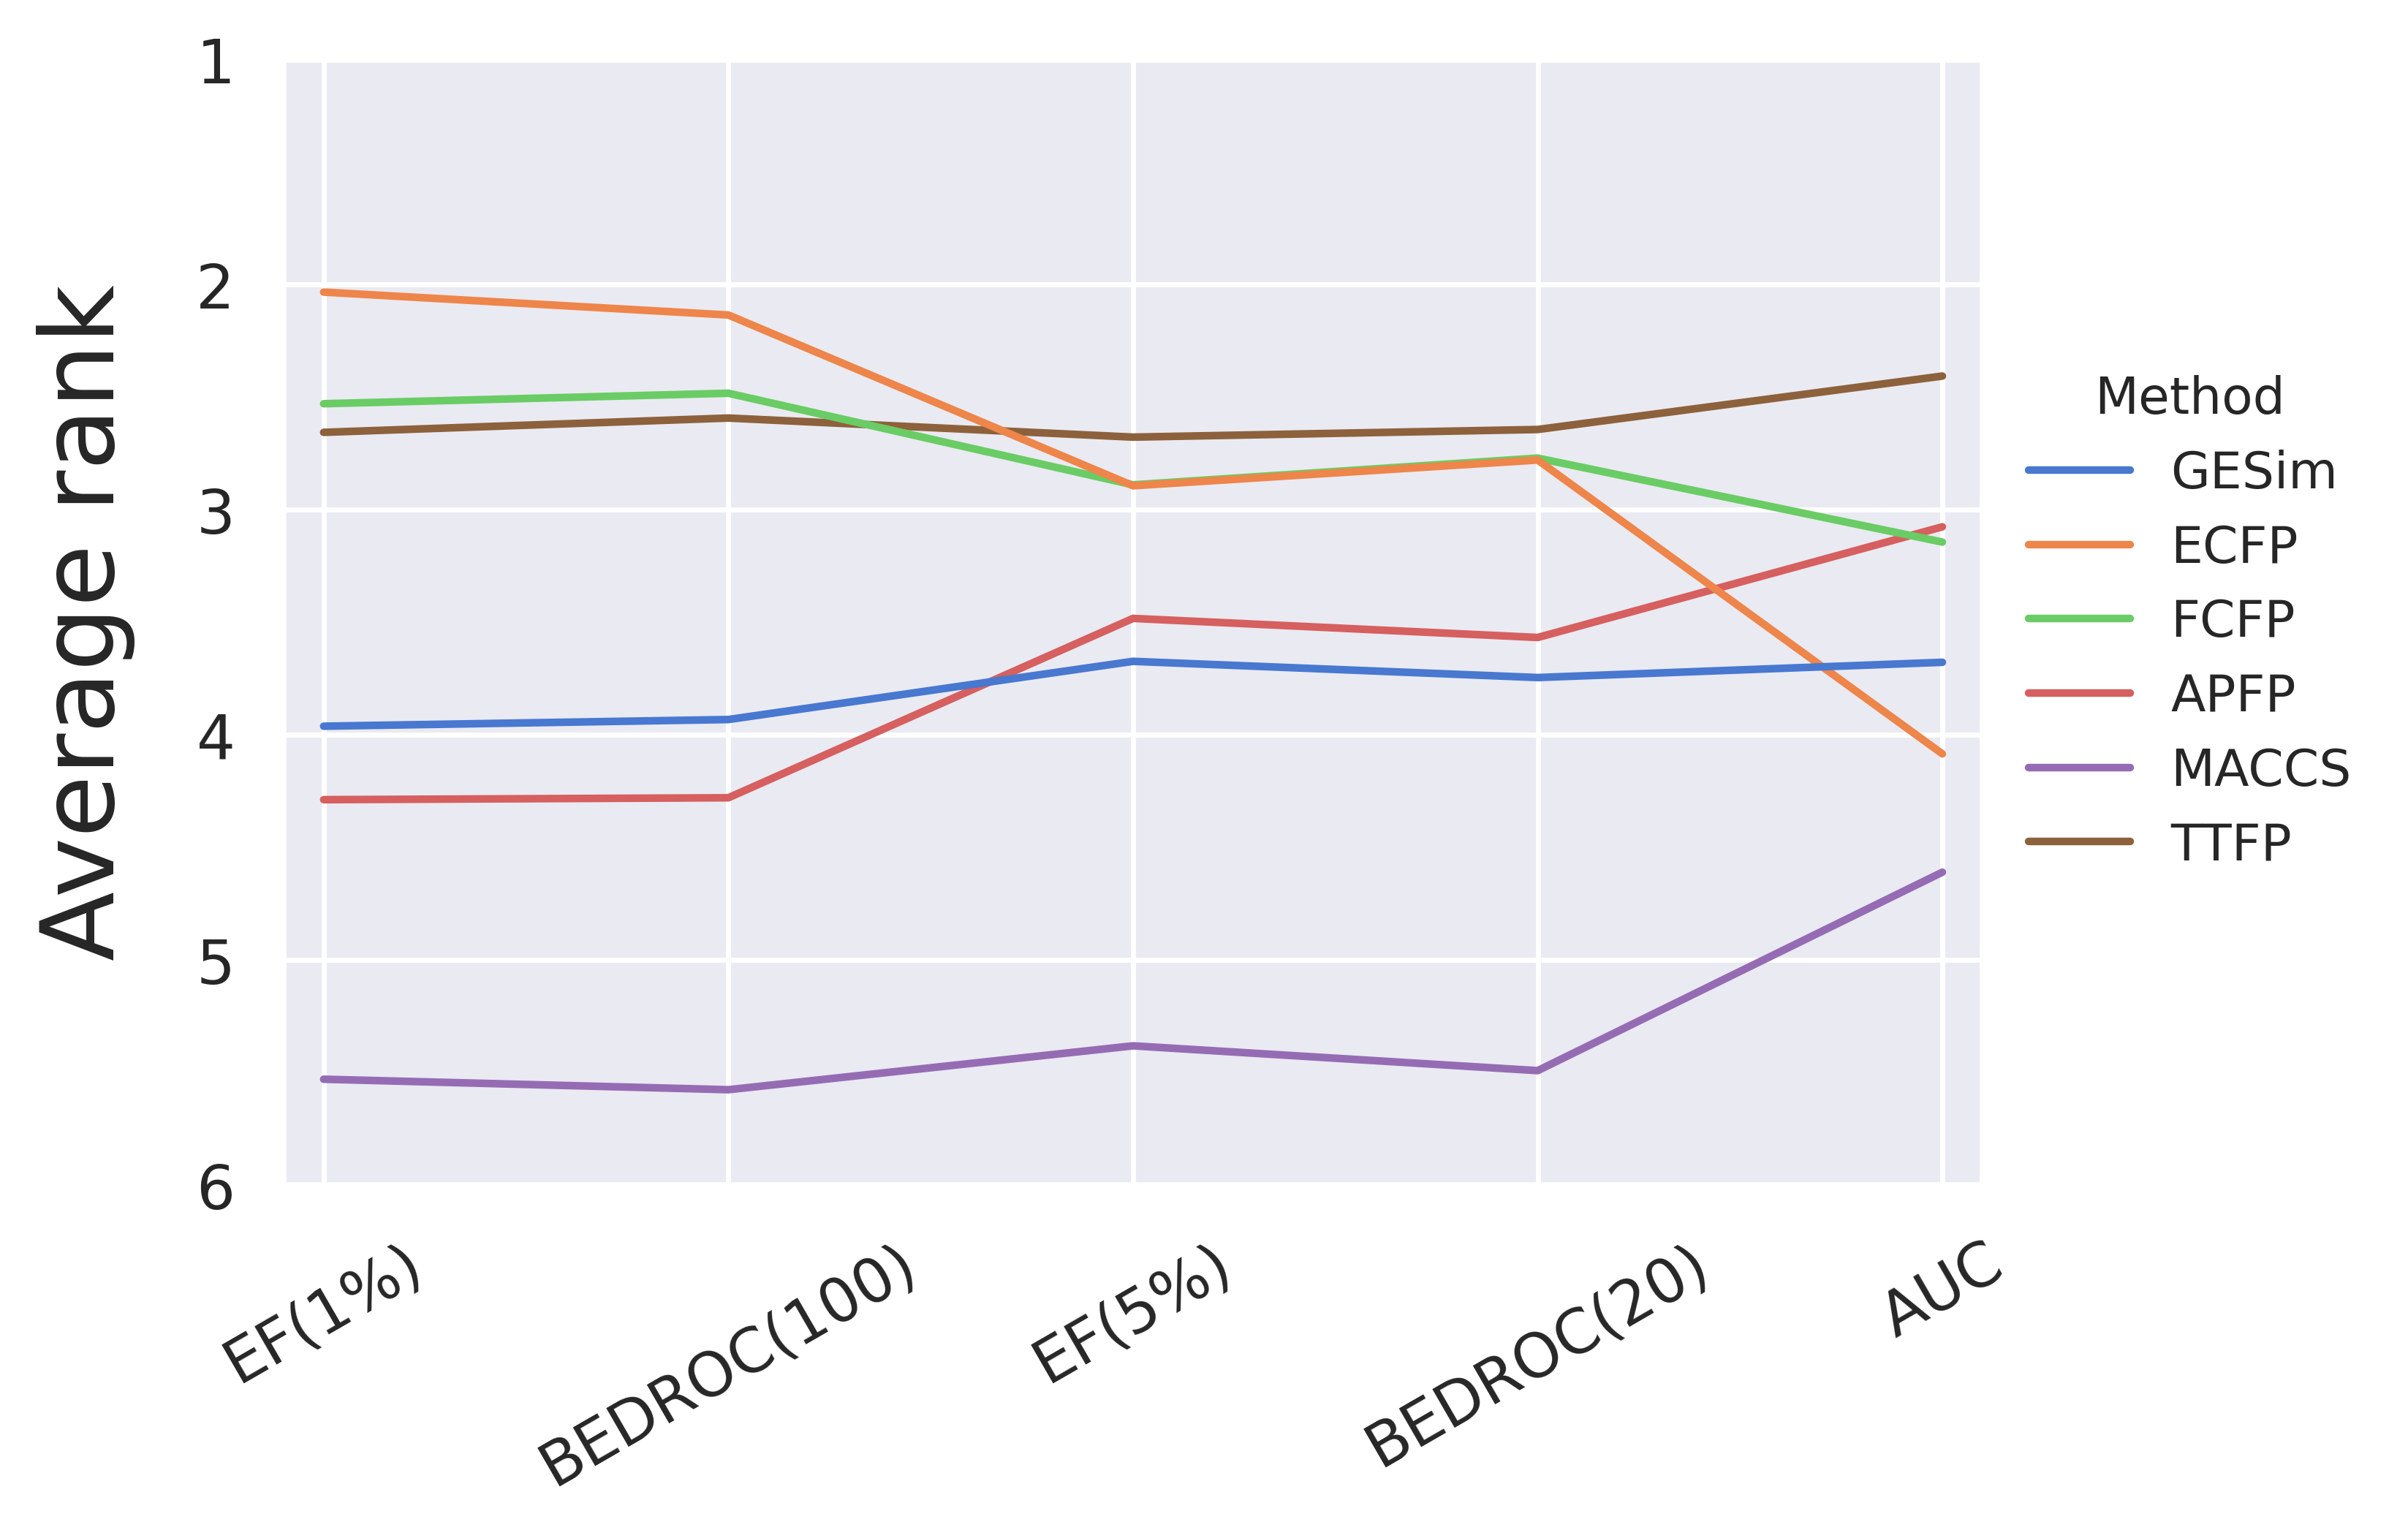

In [24]:

all_target_names = list(chain(*[result_summary_dict[d]['target_label'] for d in dataset_names]))
max_label_length = max([len(s) for s in all_target_names])
all_target_names_pad = [s.rjust(max_label_length) for s in all_target_names]

metrics = [ 'enrichment_factor_f001', 'BEDROC_a100', 'enrichment_factor_f005', 'BEDROC_a20', 'AUC']

dfs = []
for metric in metrics:
    df = pd.DataFrame(
        {
         "TTFP": list(chain(*[result_summary_dict[d]['result_content']['tt_fp']['mean'][metric] for d in dataset_names])),
         "MACCS": list(chain(*[result_summary_dict[d]['result_content']['maccs_key']['mean'][metric] for d in dataset_names])),
         "APFP": list(chain(*[result_summary_dict[d]['result_content']['atom_pair_fp']['mean'][metric] for d in dataset_names])),
         "FCFP": list(chain(*[result_summary_dict[d]['result_content']['fc_fp']['mean'][metric] for d in dataset_names])),
         "ECFP": list(chain(*[result_summary_dict[d]['result_content']['morgan_fp']['mean'][metric] for d in dataset_names])),
         "GESim": list(chain(*[result_summary_dict[d]['result_content']['ge_sim']['mean'][metric] for d in dataset_names])),
         },
        index=all_target_names_pad
    ).T
    df.index.name = "Method"
    dfs.append(df.rank(ascending=False).mean(axis=1).rename(metric))
df_rank = pd.concat(dfs, axis=1)


df_rank.rename(columns={"BEDROC_a20": "BEDROC(20)",
                        "BEDROC_a100": "BEDROC(100)",
                        "enrichment_factor_f001": "EF(1%)",
                        "enrichment_factor_f005": "EF(5%)",}, inplace=True)
df_rank_ = df_rank.reset_index().melt(id_vars="Method", var_name="Target", value_name="Value")
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax = sns.lineplot(df_rank_, x="Target", y="Value", hue="Method", marker=None, markersize=3, palette=sns.color_palette("muted")[:6][::-1], ax=ax)
ax.set_ylim(6, 1)
ax.set_xlim(-0.1, 4.1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Method", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=10, frameon=False)
ax.set_xlabel("", fontsize=24, labelpad=12)
ax.set_ylabel("Average rank", fontsize=20, labelpad=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
